In [1]:
from sympy import symbols, Eq, solve


# 定义符号变量
Vo_k, Vo_k_minus_1, Vo_k_minus_2 = symbols('Vo_k Vo_k_minus_1 Vo_k_minus_2')
Vx_k, Vx_k_minus_1, Vx_k_minus_2 = symbols('Vx_k Vx_k_minus_1 Vx_k_minus_2')
Vi_k, Vi_k_minus_1, Vi_k_minus_2 = symbols('Vi_k Vi_k_minus_1 Vi_k_minus_2')
RC, Ts = symbols('RC Ts')

# 定义方程组
equations = [
    Eq(RC * ( (Vx_k - Vo_k) - (Vx_k_minus_1 - Vo_k_minus_1) ) / Ts, Vo_k),
    Eq(RC * ( (Vx_k_minus_1 - Vo_k_minus_1) - (Vx_k_minus_2 - Vo_k_minus_2) ) / Ts, Vo_k_minus_1),
    Eq(RC * ( (Vi_k - Vx_k) - (Vi_k_minus_1 - Vx_k_minus_1) ) / Ts, Vx_k),
    Eq(RC * ( (Vi_k_minus_1 - Vx_k_minus_1) - (Vi_k_minus_2 - Vx_k_minus_2) ) / Ts, Vx_k_minus_1)
]

# 解方程组，得到Vx_k_minus_1、Vx_k_minus_2和Vx_k（前三个公式）
solutions_ab = solve(equations[:3], (Vx_k_minus_1, Vx_k_minus_2,Vx_k))

# 将Vx_k_minus_1和Vx_k_minus_2 的解代入第四个方程
equation_c = equations[3].subs(solutions_ab)

# 解方程，得到 Vo_k 关于 Vo_k_minus_1、Vo_k_minus_2、Vi_k、Vii_k_minus_1、Vi_k_minus_2的表达式
solution_c = solve(equation_c, Vo_k)

# 打印结果
print("Vo_k表达式:")
print(solution_c)


Vo_k表达式:
[RC*(RC*Vi_k - 2*RC*Vi_k_minus_1 + RC*Vi_k_minus_2 + 2*RC*Vo_k_minus_1 - RC*Vo_k_minus_2 + 2*Ts*Vo_k_minus_1)/(RC**2 + 2*RC*Ts + Ts**2)]


In [8]:
equations[0]

Eq(RC*(-Vo_k + Vo_k_minus_1 + Vx_k - Vx_k_minus_1)/Ts, Vo_k)

solutions_ab

In [13]:
solutions_ab

{Vx_k_minus_1: (RC**2*Vi_k - RC**2*Vi_k_minus_1 - RC**2*Vo_k + RC**2*Vo_k_minus_1 - 2*RC*Ts*Vo_k + RC*Ts*Vo_k_minus_1 - Ts**2*Vo_k)/(RC*Ts),
 Vx_k_minus_2: (RC**2*Vi_k - RC**2*Vi_k_minus_1 - RC**2*Vo_k + RC**2*Vo_k_minus_1 - 2*RC*Ts*Vo_k + RC*Ts*Vo_k_minus_2 - Ts**2*Vo_k - Ts**2*Vo_k_minus_1)/(RC*Ts),
 Vx_k: (RC*Vi_k - RC*Vi_k_minus_1 - RC*Vo_k + RC*Vo_k_minus_1 - Ts*Vo_k)/Ts}

In [58]:
RC, Ts = symbols('RC Ts')

In [59]:
from sympy  import expand, collect,cancel,factor,sympify,lambdify,rcollect
equation_c = equations[3].subs(solutions_ab)
solution_d = solve(equation_c, Vo_k)

f = lambdify(Vo_k_minus_1 ,solution_c)

In [60]:
f(1)

NameError: name 'RC' is not defined

In [61]:
equation_c = equations[3].subs(solutions_ab)
solution_d = solve(equation_c, Vo_k)

In [62]:
display(solution_d[0])

RC*(RC*Vi_k - 2*RC*Vi_k_minus_1 + RC*Vi_k_minus_2 + 2*RC*Vo_k_minus_1 - RC*Vo_k_minus_2 + 2*Ts*Vo_k_minus_1)/(RC**2 + 2*RC*Ts + Ts**2)

In [57]:
print(solution_d)

[RC*(RC*Vi_k - 2*RC*Vi_k_minus_1 + RC*Vi_k_minus_2 + 2*RC*Vo_k_minus_1 - RC*Vo_k_minus_2 + 2*Ts*Vo_k_minus_1)/(RC**2 + 2*RC*Ts + Ts**2)]


In [54]:

d = collect(expand(solution_d[0]), [Vi_k ,Vi_k_minus_1 ,Vi_k_minus_2 ,Vo_k_minus_1,Vo_k_minus_2 ]  )


In [55]:
d

RC**2*Vi_k/(RC**2 + 2*RC*Ts + Ts**2) - 2*RC**2*Vi_k_minus_1/(RC**2 + 2*RC*Ts + Ts**2) + RC**2*Vi_k_minus_2/(RC**2 + 2*RC*Ts + Ts**2) - RC**2*Vo_k_minus_2/(RC**2 + 2*RC*Ts + Ts**2) + Vo_k_minus_1*(2*RC**2/(RC**2 + 2*RC*Ts + Ts**2) + 2*RC*Ts/(RC**2 + 2*RC*Ts + Ts**2))

<function _lambdifygenerated at 0x000002532625C900>


In [21]:
from sympy import latex
print(latex(solution_c).replace('minus', '-'))#.replace("\\\\","\\"))

\left[ \frac{RC \left(RC Vi_{k} - 2 RC Vi_{k - 1} + RC Vi_{k - 2} + 2 RC Vo_{k - 1} - RC Vo_{k - 2} + 2 Ts Vo_{k - 1}\right)}{RC^{2} + 2 RC Ts + Ts^{2}}\right]


$$
\left[ \frac{RC \left(RC Vi_{k} - 2 RC Vi_{k - 1} + RC Vi_{k - 2} + 2 RC Vo_{k - 1} - RC Vo_{k - 2} + 2 Ts Vo_{k - 1}\right)}{RC^{2} + 2 RC Ts + Ts^{2}}\right]

$$

from sympy import codegen



In [69]:
from sympy import *
init_printing(use_unicode =True)

from sympy.abc import a,e,k,n,r,t,x,y,z,T,Z
from sympy.abc import beta, omega, tau

f, g = symbols('f, g', cls=Function)

from sympy import codegen




In [70]:
from sympy.codegen.ast import Assignment

expr = (Rational(-1, 2) * Z * k * (e**2) / r)


In [72]:
from sympy.codegen.cfunctions import expm1

In [73]:
ccode(expr)

'-1.0/2.0*Z*pow(e, 2)*k/r'

In [74]:
from sympy.codegen.ast import real, float80

In [75]:
ccode(expr, assign_to="E", type_aliases={real: float80})

'E = -1.0L/2.0L*Z*powl(e, 2)*k/r;'

In [76]:
ccode(expm1(x), standard='C99')

'expm1(x)'

In [71]:
expr

Piecewise 表达式被转换成条件句

In [77]:
expr = Piecewise((x + 1, x > 0), (x, True))


In [78]:
print(fcode(expr, tau))

      if (x > 0) then
         tau = x + 1
      else
         tau = x
      end if


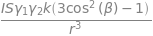

In [79]:
k, g1, g2, r, I, S = symbols("k, gamma_1, gamma_2, r, I, S")

expr = k * g1 * g2 / (r**3)
expr = expr * 2 * I * S * (3 * (cos(beta))**2 - 1) / 2
expr

In [80]:
print(jscode(expr, assign_to="H_is"))

H_is = I*S*gamma_1*gamma_2*k*(3*Math.pow(Math.cos(beta), 2) - 1)/Math.pow(r, 3);


In [81]:
print(ccode(expr, assign_to="H_is", standard='C89'))

H_is = I*S*gamma_1*gamma_2*k*(3*pow(cos(beta), 2) - 1)/pow(r, 3);


In [82]:
print(fcode(expr, assign_to="H_is"))

      H_is = I*S*gamma_1*gamma_2*k*(3*cos(beta)**2 - 1)/r**3


In [83]:
print(julia_code(expr, assign_to="H_is"))

H_is = I .* S .* gamma_1 .* gamma_2 .* k .* (3 * cos(beta) .^ 2 - 1) ./ r .^ 3


In [84]:
print(octave_code(expr, assign_to="H_is"))

H_is = I.*S.*gamma_1.*gamma_2.*k.*(3*cos(beta).^2 - 1)./r.^3;


In [85]:
print(rust_code(expr, assign_to="H_is"))

H_is = I*S*gamma_1*gamma_2*k*(3*beta.cos().powi(2) - 1)/r.powi(3);


In [86]:
print(mathematica_code(expr))

I*S*gamma_1*gamma_2*k*(3*Cos[beta]^2 - 1)/r^3


In [91]:
from sympy.utilities.codegen import codegen

In [92]:
length, breadth, height = symbols('length, breadth, height')
[(c_name, c_code), (h_name, c_header)] = codegen(('volume', length*breadth*height), "C99", "test",
        header=False, empty=False)

print(c_name)

test.c


In [93]:
print(c_code)

#include "test.h"
#include <math.h>
double volume(double breadth, double height, double length) {
   double volume_result;
   volume_result = breadth*height*length;
   return volume_result;
}



In [94]:
print(h_name)

test.h


In [95]:
print(c_header)

#ifndef PROJECT__TEST__H
#define PROJECT__TEST__H
double volume(double breadth, double height, double length);
#endif



In [96]:
[(f_name, f_code), header] = codegen(("volume", length*breadth*height),

    "F95", header=False, empty=False, argument_sequence=(breadth, length),

    global_vars=(height,))

print(f_code)

REAL*8 function volume(breadth, length)
implicit none
REAL*8, intent(in) :: breadth
REAL*8, intent(in) :: length
volume = breadth*height*length
end function



In [97]:
from sympy.utilities.codegen import make_routine
from sympy.physics.hydrogen import R_nl

In [98]:
expr = R_nl(3, y, x, 6)

In [99]:
routine = make_routine('my_routine', expr)

In [100]:
[arg.result_var for arg in routine.results]   

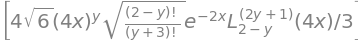

In [108]:
[arg.expr for arg in routine.results]   

In [109]:
for arg in routine.results:
    print(arg.expr)

4*sqrt(6)*(4*x)**y*sqrt(factorial(2 - y)/factorial(y + 3))*exp(-2*x)*assoc_laguerre(2 - y, 2*y + 1, 4*x)/3


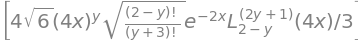

In [103]:
[arg.expr for arg in routine.results]



In [105]:
for arg in routine.arguments

[InputArgument(x), InputArgument(y)]

In [111]:
routine = make_routine('fcn', [x*y, Eq(a, 1), Eq(r, x + r), Matrix([[x, 2]])])
[arg.result_var for arg in routine.results]   


In [112]:
[arg.expr for arg in routine.results]

In [113]:
[arg.name for arg in routine.arguments]   

----------------

In [118]:
from sympy.utilities.autowrap import ufuncify
from sympy.utilities.lambdify import lambdify
from sympy.abc import x


In [119]:
expr = R_nl(3, 1, x, 6)
fn_numpy = lambdify(x, expr, 'numpy')   
fn_fortran = ufuncify([x], expr, backend='f2py')    


CodeWrapError: Error while executing command: c:\anaconda3\python.exe -c import numpy.f2py as f2py2e;f2py2e.main() -c -m wrapper_module_2 wrapped_code_2.f90. Command output is:
running build
running config_cc
INFO: unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
INFO: unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
INFO: build_src
INFO: building extension "wrapper_module_2" sources
INFO: f2py options: []
INFO: f2py:> C:\Users\wk2024\AppData\Local\Temp\tmpp8rimk3g\src.win-amd64-3.11\wrapper_module_2module.c
creating C:\Users\wk2024\AppData\Local\Temp\tmpp8rimk3g\src.win-amd64-3.11
Reading fortran codes...
	Reading file 'wrapped_code_2.f90' (format:free)
Post-processing...
	Block: wrapper_module_2
			Block: autofunc
Applying post-processing hooks...
  character_backward_compatibility_hook
Post-processing (stage 2)...
Building modules...
    Building module "wrapper_module_2"...
    Generating possibly empty wrappers"
    Maybe empty "wrapper_module_2-f2pywrappers.f"
        Constructing wrapper function "autofunc"...
          y_2837006 = autofunc(x_2837010,[m_2837007])
    Wrote C/API module "wrapper_module_2" to file "C:\Users\wk2024\AppData\Local\Temp\tmpp8rimk3g\src.win-amd64-3.11\wrapper_module_2module.c"
INFO:   adding 'C:\Users\wk2024\AppData\Local\Temp\tmpp8rimk3g\src.win-amd64-3.11\fortranobject.c' to sources.
INFO:   adding 'C:\Users\wk2024\AppData\Local\Temp\tmpp8rimk3g\src.win-amd64-3.11' to include_dirs.
copying c:\anaconda3\Lib\site-packages\numpy\f2py\src\fortranobject.c -> C:\Users\wk2024\AppData\Local\Temp\tmpp8rimk3g\src.win-amd64-3.11
copying c:\anaconda3\Lib\site-packages\numpy\f2py\src\fortranobject.h -> C:\Users\wk2024\AppData\Local\Temp\tmpp8rimk3g\src.win-amd64-3.11
INFO:   adding 'C:\Users\wk2024\AppData\Local\Temp\tmpp8rimk3g\src.win-amd64-3.11\wrapper_module_2-f2pywrappers.f' to sources.
INFO: build_src: building npy-pkg config files
c:\anaconda3\Lib\site-packages\setuptools\_distutils\cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
running build_ext
INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
INFO: customize MSVCCompiler
INFO: customize MSVCCompiler using build_ext
INFO: get_default_fcompiler: matching types: '['gnu', 'intelv', 'absoft', 'compaqv', 'intelev', 'gnu95', 'g95', 'intelvem', 'intelem', 'flang']'
INFO: customize GnuFCompiler
WARN: Could not locate executable g77
WARN: Could not locate executable f77
INFO: customize IntelVisualFCompiler
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
INFO: customize AbsoftFCompiler
WARN: Could not locate executable f90
INFO: customize CompaqVisualFCompiler
WARN: Could not locate executable DF
INFO: customize IntelItaniumVisualFCompiler
WARN: Could not locate executable efl
INFO: customize Gnu95FCompiler
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
INFO: customize G95FCompiler
WARN: Could not locate executable g95
INFO: customize IntelEM64VisualFCompiler
INFO: customize IntelEM64TFCompiler
WARN: Could not locate executable efort
WARN: Could not locate executable efc
INFO: customize PGroupFlangCompiler
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'
warning: build_ext: f77_compiler=None is not available.

INFO: building 'wrapper_module_2' extension
error: extension 'wrapper_module_2' has Fortran sources but no Fortran compiler found


In [ ]:
from numpy import linspace  
xx = linspace(0, 1, 5)  

In [120]:
len_y = 5
mat_1 = IndexedBase('mat_1', shape=(len_y,))
mat_2 = IndexedBase('mat_2', shape=(len_y,))
Dy = IndexedBase('Dy', shape=(len_y-1,))
i = Idx('i', len_y-1)

eq = Eq(Dy[i], (mat_1[i+1] - mat_1[i]) / (mat_2[i+1] - mat_2[i]))

In [124]:
print(eq)

Eq(Dy[i], (mat_1[i + 1] - mat_1[i])/(mat_2[i + 1] - mat_2[i]))


In [123]:
print(ccode(eq.rhs, assign_to=eq.lhs, contract=False))

Dy[i] = (mat_1[i + 1] - mat_1[i])/(mat_2[i + 1] - mat_2[i]);


In [125]:
Res = IndexedBase('Res', shape=(len_y,))

In [126]:
j = Idx('j', len_y)

In [127]:
eq = Eq(Res[j], mat_1[j]*mat_2[j])

In [128]:
eq

Res[j] = mat_1[j]⋅mat_2[j]

In [135]:
print(fcode(eq.rhs, assign_to=eq.lhs, contract=True))

      do j = 1, 5
         Res(j) = 0
      end do
      do j = 1, 5
         do j = 1, 5
            Res(j) = Res(j) + mat_1(j)*mat_2(j)
         end do
      end do


In [133]:
print(ccode(eq.rhs, assign_to=eq.lhs, contract=False))

Res[j] = mat_1[j]*mat_2[j];



------------


低通滤波器传递函数

L(S) = 1/ (R_1 C_1 S + 1)

高通滤波器的传递函数 

G(S ) =     (R_2 C_2 S) /(  R_2 C_2 S + 1)


**带阻滤波器**是由低通和高通滤波器以并联方式组合而成，衰减的频率范围称为阻带

由于它消除了频率，也被称为**陷波滤波器**。

陷波滤波器

传递函数

#陷波滤波器
H(S) = L(S) + G(S)

陷波滤波器一般形式
$$ 
H(S) = \frac{S^2 + 2k_2 \omega _n S + \omega _n^2}
        { S^2 + 2k_1 \omega _n S + \omega _n^2}
$$


$\omega _n$ 为陷波系数

$k_1$ 为陷波系数1

$k_2$ 为陷波系数2



Y(S) = H(S)X(S)

？？？  采用双线性变换的离散方法（其本质是一种数值积分法，采用梯形方法来近似计算积分）

？？？ 利用Z变换的信号滞后特点得

陷波滤波器_ 离散形式

$$
Y(n)=
\frac{b_1}{a_1}X(n)
+
\frac{b_2}{a_1}X(n-1)
+
\frac{b_3}{a_1}X(n-2)
-
\frac{a_2}{a_1}Y(n-1)
-
\frac{a_3}{a_1}Y(n-2)

$$

其中

$
a_1 = \omega _n^2 T_s^2 + 4T_s k_1 \omega _n + 4
$

$
a_2 = b_2 = 2 \omega _n^2 T_s^2 -8
$

$
a_3 = \omega _n^2 T_s^2 - 4T_s k_1 \omega _n + 4
$

$
b_1 = \omega _n^2 T_s^2 + 4T_s k_2 \omega _n + 4
$

$
a_3 = \omega _n^2 T_s^2 - 4T_s k_2 \omega _n + 4
$

